In [1]:
import json
import pandas as pd
from pathlib import Path
from lib.utils import read_jsonl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
import numpy as np

### Load data (root dir: extracted/)

In [2]:
results = {
    'title generation': [],
    'title selection': []

}

for (fname, task) in [('subid_to_titles_match.json', 'title generation'), ('subid_to_choice.json', 'title selection')]:
    print(task)

    for in_path in Path(f'extracted').rglob(fname):
        with open(in_path, 'r') as file:
            data = json.load(file)

        print(f"{len(data):5} | {in_path}")

        config = str(in_path).split('/')

        model = config[1]
        domain = config[2]
        modality = config[3]
        if modality != 'image':
            modality = 'descr/' + modality
        
        results[task].append(
            {
                'modality': modality,
                'domain': domain,
                'model': model,
                'task': task,
                'data': data,
                'fpath': in_path
            }
        )

title generation
  796 | extracted/gpt-4-0125-preview/music/llava-v1.5-13b/subid_to_titles_match.json
  796 | extracted/gpt-4-0125-preview/music/OFA-huge/subid_to_titles_match.json
  796 | extracted/gpt-4-0125-preview/music/gpt-4-vision-preview/subid_to_titles_match.json
 1470 | extracted/gpt-4-0125-preview/books/llava-v1.5-13b/subid_to_titles_match.json
 1470 | extracted/gpt-4-0125-preview/books/OFA-huge/subid_to_titles_match.json
 1470 | extracted/gpt-4-0125-preview/books/gpt-4-vision-preview/subid_to_titles_match.json
  796 | extracted/llava-v1.5-CoI/music/image/subid_to_titles_match.json
 1470 | extracted/llava-v1.5-CoI/books/image/subid_to_titles_match.json
  796 | extracted/gpt-3.5-turbo-0125/music/llava-v1.5-13b/subid_to_titles_match.json
  796 | extracted/gpt-3.5-turbo-0125/music/OFA-huge/subid_to_titles_match.json
  796 | extracted/gpt-3.5-turbo-0125/music/gpt-4-vision-preview/subid_to_titles_match.json
 1470 | extracted/gpt-3.5-turbo-0125/books/llava-v1.5-13b/subid_to_titles_

### Title generation

In [3]:
def get_hit_k(input_list, k):
    hit_k = 0 
    for i in input_list[:k]:
        if isinstance(i, dict):
            hit_k = 1
    return hit_k

In [4]:
for r in results['title generation']:
    
    subid_to_match = r['data']

    for k in [1, 10, 20]:
        avg_hit_k = 0    
        for subid in subid_to_match:
            
            hit_k = get_hit_k(subid_to_match[subid], k)
            avg_hit_k += hit_k 
        
        avg_hit_k /= len(subid_to_match)
        r[f'Hit@{k}'] = avg_hit_k

In [5]:
tg_results_df = pd.DataFrame(results['title generation']).drop(['data', 'fpath'], axis=1)
tg_results_df.sort_values(by=['modality', 'domain', 'model', 'task'], inplace=True)

In [6]:
tg_results_df 

,modality,domain,model,task,Hit@1,Hit@10,Hit@20
18,descr/OFA-huge,books,Llama-2-13b-chat-hf,title generation,0.052381,0.139456,0.174830
12,descr/OFA-huge,books,gpt-3.5-turbo-0125,title generation,0.140816,0.350340,0.412245
4,descr/OFA-huge,books,gpt-4-0125-preview,title generation,0.146939,0.383673,0.431293
35,descr/OFA-huge,books,gpt-4-vision-preview,title generation,0.150340,0.382313,0.442177
26,descr/OFA-huge,books,vicuna-13b-v1.5,title generation,0.001361,0.007483,0.010204
15,descr/OFA-huge,music,Llama-2-13b-chat-hf,title generation,0.042714,0.106784,0.149497
9,descr/OFA-huge,music,gpt-3.5-turbo-0125,title generation,0.046482,0.157035,0.194724
1,descr/OFA-huge,music,gpt-4-0125-preview,title generation,0.070352,0.195980,0.237437
31,descr/OFA-huge,music,gpt-4-vision-preview,title generation,0.079146,0.202261,0.236181
23,descr/OFA-huge,music,vicuna-13b-v1.5,title generation,0.010050,0.025126,0.027638


### Title selection

In [7]:
domain_to_gt = {
    'books': pd.DataFrame(read_jsonl('data/processed/books/submissions_ns.jsonl'), columns = ['submission_id', 'true_index']),
    'music': pd.DataFrame(read_jsonl('data/processed/music/submissions_ns.jsonl'), columns = ['submission_id', 'true_index'])
}
for domain in domain_to_gt:
    domain_to_gt[domain] = {row['submission_id']: row['true_index'] for _, row in domain_to_gt[domain].iterrows()}

# values are dict (subid -> choice)

In [8]:
for r in results['title selection']:
    
    subid_to_choice = r['data']
    domain = r['domain']

    acc = 0
    for subid in subid_to_choice:
        pr = subid_to_choice[subid]
        gt = domain_to_gt[domain][subid]
        
        if pr == gt:
            acc += 1

    acc /= len(subid_to_choice)

    r['Accuracy'] = acc # float(f"{acc:.4f}")

In [9]:
ts_results_df = pd.DataFrame(results['title selection']).drop(['data', 'fpath'], axis=1)
ts_results_df.sort_values(by=['modality', 'domain', 'model', 'task'], inplace=True)

In [10]:
ts_results_df

,modality,domain,model,task,Accuracy
18,descr/OFA-huge,books,Llama-2-13b-chat-hf,title selection,0.390476
12,descr/OFA-huge,books,gpt-3.5-turbo-0125,title selection,0.606122
4,descr/OFA-huge,books,gpt-4-0125-preview,title selection,0.734694
35,descr/OFA-huge,books,gpt-4-vision-preview,title selection,0.707483
26,descr/OFA-huge,books,vicuna-13b-v1.5,title selection,0.289796
15,descr/OFA-huge,music,Llama-2-13b-chat-hf,title selection,0.297739
9,descr/OFA-huge,music,gpt-3.5-turbo-0125,title selection,0.457286
1,descr/OFA-huge,music,gpt-4-0125-preview,title selection,0.528894
31,descr/OFA-huge,music,gpt-4-vision-preview,title selection,0.530151
23,descr/OFA-huge,music,vicuna-13b-v1.5,title selection,0.265075


### Results dir

In [17]:
results_dir = Path('results-more-plots')
results_dir.mkdir(exist_ok=True, parents=True)

In [18]:
tg_results_df.to_csv(results_dir / 'title_generation.csv')
ts_results_df.to_csv(results_dir / 'title_selection.csv')

### Performance correlation between two tasks

In [19]:
plt.rcParams.update({'font.size': 14}) 

colormap = {
    'books': 'tab:blue',
    'music': 'tab:olive'
}

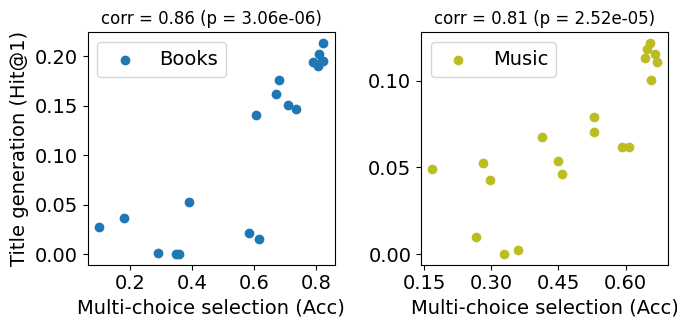

In [20]:
books_ts = ts_results_df[ts_results_df['domain'] == 'books']
books_tg = tg_results_df[tg_results_df['domain'] == 'books']
music_ts = ts_results_df[ts_results_df['domain'] == 'music']
music_tg = tg_results_df[tg_results_df['domain'] == 'music']

corr_books, p_value_books = pearsonr(books_ts['Accuracy'], books_tg[f'Hit@{k}'])
corr_music, p_value_music = pearsonr(music_ts['Accuracy'], music_tg[f'Hit@{k}'])

fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))

k = 1
axs[0].scatter(books_ts['Accuracy'], books_tg[f'Hit@{k}'], color=colormap['books'], label='Books')
image_modality_books = books_ts['modality'] == 'image'
# axs[0].scatter(books_ts[image_modality_books]['Accuracy'], books_tg[image_modality_books][f'Hit@{k}'], facecolors='none', edgecolors='red', linewidth=1.5, s=120)  # red circle
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0].set_xlabel('Multi-choice selection (Acc)')
axs[0].set_ylabel(f'Title generation (Hit@{k})')
axs[0].set_title(f'corr = {corr_books:.2f} (p = {p_value_books:.2e})', fontsize=12)
axs[0].legend(loc='upper left')

axs[1].scatter(music_ts['Accuracy'], music_tg[f'Hit@{k}'], color=colormap['music'], label='Music')
image_modality_music = music_ts['modality'] == 'image'
# axs[1].scatter(music_ts[image_modality_music]['Accuracy'], music_tg[image_modality_music][f'Hit@{k}'], facecolors='none', edgecolors='red', linewidth=1.5, s=120)  # red circle
axs[1].set_title(f'corr = {corr_music:.2f} (p = {p_value_music:.2e})', fontsize=12)
axs[1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1].set_xlabel('Multi-choice selection (Acc)')

axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

fig.tight_layout()
fig.savefig(results_dir / f'correlation.pdf', bbox_inches='tight')

### How do descriptions affect performance?

In [21]:
model_name_to_display_name = {
    'OFA-huge': 'OFA',
    'llava-v1.5-13b': 'LLaVA',
    'llava-v1.5-CoI': 'LLaVA CoI',
    'vicuna-13b-v1.5': 'Vicuna',
    'Llama-2-13b-chat-hf': 'LLaMA',
    'gpt-3.5-turbo-0125': 'GPT-3.5',
    'gpt-4-0125-preview': 'GPT-4',
    'gpt-4-vision-preview': 'GPT-4V',
    'gpt-4-vision-CoI': 'GPT-4V CoI',
}

In [22]:
model_name_to_style = {
    'vicuna-13b-v1.5': ('x', 'red'),
    'Llama-2-13b-chat-hf': ('*', 'purple'),
    'gpt-3.5-turbo-0125': ('o', 'orange'),
    'gpt-4-0125-preview': ('<', 'green'),
    'gpt-4-vision-preview': ('d', 'blue'),
}

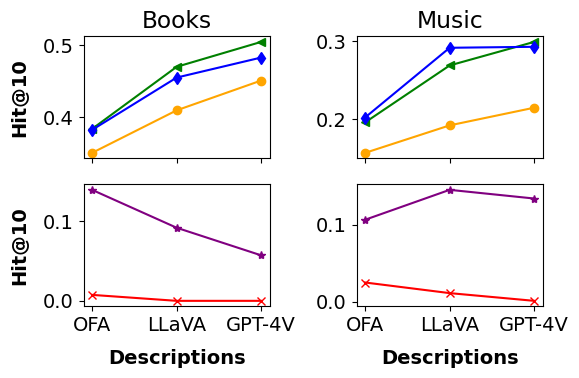

In [23]:
modalities = ['descr/OFA-huge', 'descr/llava-v1.5-13b', 'descr/gpt-4-vision-preview']
markers = ['*', 'o', '<', 'd', 'x']  

def plot_domain(ax, domain, metric, handles_labels, models):
    df_filtered = tg_results_df[tg_results_df['domain'] == domain]
    df_pivoted = df_filtered.pivot(index='modality', columns='model', values=metric).reindex(modalities)
    
    i = 0
    for model in df_pivoted.columns:
        if model not in models:
            continue
        line, = ax.plot(df_pivoted.index, df_pivoted[model], color=model_name_to_style[model][1], marker=model_name_to_style[model][0], label=model_name_to_display_name.get(model, model))
        handles_labels.append((line, model_name_to_display_name.get(model, model)))
        i += 1
        
    ax.set_xticks(range(len(df_pivoted.index)))
    ax.set_xticklabels([model_name_to_display_name.get(m.split('/')[-1], m.split('/')[-1]) for m in modalities])
    

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4), sharey=False, sharex=True)

handles_labels_gpt = []
handles_labels_other = []

# Plot GPT models
plot_domain(axes[0][0], 'books', 'Hit@10', handles_labels_gpt, models=['gpt-3.5-turbo-0125', 'gpt-4-0125-preview', 'gpt-4-vision-preview'])
plot_domain(axes[0][1], 'music', 'Hit@10', handles_labels_gpt, models=['gpt-3.5-turbo-0125', 'gpt-4-0125-preview', 'gpt-4-vision-preview'])

# Plot other models
plot_domain(axes[1][0], 'books', 'Hit@10', handles_labels_other, models=['vicuna-13b-v1.5', 'Llama-2-13b-chat-hf'])
plot_domain(axes[1][1], 'music', 'Hit@10', handles_labels_other, models=['vicuna-13b-v1.5', 'Llama-2-13b-chat-hf'])

labelpad = 10
axes[0][0].set_ylabel('Hit@10', labelpad=labelpad, fontweight='bold')
axes[1][0].set_ylabel('Hit@10', labelpad=labelpad, fontweight='bold')
axes[1][0].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')
axes[1][1].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')

axes[0][0].set_title('Books')
axes[0][1].set_title('Music')

fig.tight_layout()
fig.savefig(results_dir / f'title_generation_trend.pdf', bbox_inches='tight')

plt.show()

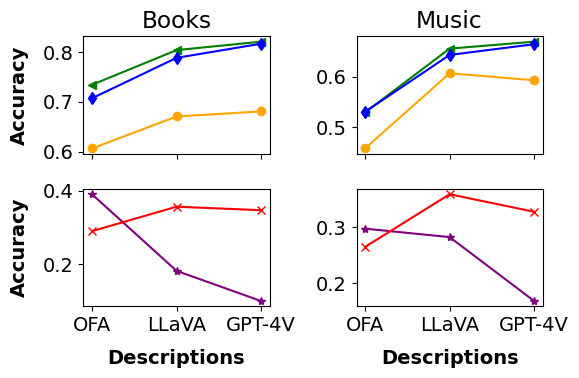

In [24]:
modalities = ['descr/OFA-huge', 'descr/llava-v1.5-13b', 'descr/gpt-4-vision-preview']
markers = ['*', 'o', '<', 'd', 'x']  

def plot_domain(ax, domain, metric, handles_labels, models):
    df_filtered = ts_results_df[ts_results_df['domain'] == domain]
    df_pivoted = df_filtered.pivot(index='modality', columns='model', values=metric).reindex(modalities)
    
    i = 0
    for model in df_pivoted.columns:
        if model not in models:
            continue
        line, = ax.plot(df_pivoted.index, df_pivoted[model], color=model_name_to_style[model][1], marker=model_name_to_style[model][0], label=model_name_to_display_name.get(model, model))
        handles_labels.append((line, model_name_to_display_name.get(model, model)))
        i += 1
        
    ax.set_xticks(range(len(df_pivoted.index)))
    ax.set_xticklabels([model_name_to_display_name.get(m.split('/')[-1], m.split('/')[-1]) for m in modalities])
    

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4), sharey=False, sharex=True)

handles_labels_gpt = []
handles_labels_other = []

# Plot GPT models
plot_domain(axes[0][0], 'books', 'Accuracy', handles_labels_gpt, models=['gpt-3.5-turbo-0125', 'gpt-4-0125-preview', 'gpt-4-vision-preview'])
plot_domain(axes[0][1], 'music', 'Accuracy', handles_labels_gpt, models=['gpt-3.5-turbo-0125', 'gpt-4-0125-preview', 'gpt-4-vision-preview'])

# Plot other models
plot_domain(axes[1][0], 'books', 'Accuracy', handles_labels_other, models=['vicuna-13b-v1.5', 'Llama-2-13b-chat-hf'])
plot_domain(axes[1][1], 'music', 'Accuracy', handles_labels_other, models=['vicuna-13b-v1.5', 'Llama-2-13b-chat-hf'])

labelpad = 10
axes[0][0].set_ylabel('Accuracy', labelpad=labelpad, fontweight='bold')
axes[1][0].set_ylabel('Accuracy', labelpad=labelpad, fontweight='bold')
axes[1][0].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')
axes[1][1].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')

axes[0][0].set_title('Books')
axes[0][1].set_title('Music')

fig.tight_layout()
fig.savefig(results_dir / f'title_selection_trend.pdf', bbox_inches='tight')

plt.show()

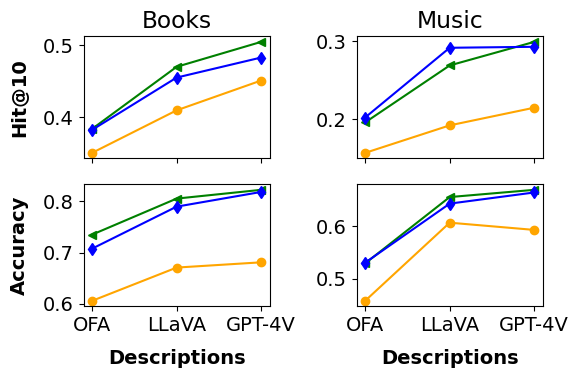

In [25]:
modalities = ['descr/OFA-huge', 'descr/llava-v1.5-13b', 'descr/gpt-4-vision-preview']
markers = ['*', 'o', '<', 'd', 'x']  

def plot_domain(df, ax, domain, metric, handles_labels, models):
    df_filtered = df[df['domain'] == domain]
    df_pivoted = df_filtered.pivot(index='modality', columns='model', values=metric).reindex(modalities)
    
    i = 0
    for model in df_pivoted.columns:
        if model not in models:
            continue
        line, = ax.plot(df_pivoted.index, df_pivoted[model], color=model_name_to_style[model][1], marker=model_name_to_style[model][0], label=model_name_to_display_name.get(model, model))
        handles_labels.append((line, model_name_to_display_name.get(model, model)))
        i += 1
        
    ax.set_xticks(range(len(df_pivoted.index)))
    ax.set_xticklabels([model_name_to_display_name.get(m.split('/')[-1], m.split('/')[-1]) for m in modalities])
    

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4), sharey=False, sharex=True)

handles_labels_gpt = []

models=['gpt-3.5-turbo-0125', 'gpt-4-0125-preview', 'gpt-4-vision-preview']
plot_domain(tg_results_df, axes[0][0], 'books', 'Hit@10', handles_labels_gpt, models)
plot_domain(tg_results_df, axes[0][1], 'music', 'Hit@10', handles_labels_gpt, models)

plot_domain(ts_results_df, axes[1][0], 'books', 'Accuracy', handles_labels_gpt, models)
plot_domain(ts_results_df, axes[1][1], 'music', 'Accuracy', handles_labels_gpt, models)

labelpad = 10
axes[0][0].set_ylabel('Hit@10', labelpad=labelpad, fontweight='bold')
axes[1][0].set_ylabel('Accuracy', labelpad=labelpad, fontweight='bold')
axes[1][0].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')
axes[1][1].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')

axes[0][0].set_title('Books')
axes[0][1].set_title('Music')

fig.tight_layout()
fig.savefig(results_dir / f'description_trend_closed.pdf', bbox_inches='tight')

plt.show()

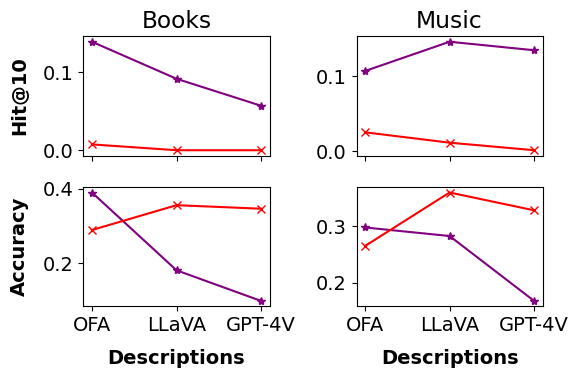

In [26]:
modalities = ['descr/OFA-huge', 'descr/llava-v1.5-13b', 'descr/gpt-4-vision-preview']
markers = ['*', 'o', '<', 'd', 'x']  

def plot_domain(df, ax, domain, metric, handles_labels, models):
    df_filtered = df[df['domain'] == domain]
    df_pivoted = df_filtered.pivot(index='modality', columns='model', values=metric).reindex(modalities)
    
    i = 0
    for model in df_pivoted.columns:
        if model not in models:
            continue
        line, = ax.plot(df_pivoted.index, df_pivoted[model], color=model_name_to_style[model][1], marker=model_name_to_style[model][0], label=model_name_to_display_name.get(model, model))
        handles_labels.append((line, model_name_to_display_name.get(model, model)))
        i += 1
        
    ax.set_xticks(range(len(df_pivoted.index)))
    ax.set_xticklabels([model_name_to_display_name.get(m.split('/')[-1], m.split('/')[-1]) for m in modalities])
    

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4), sharey=False, sharex=True)

handles_labels_gpt = []

models=['vicuna-13b-v1.5', 'Llama-2-13b-chat-hf']
plot_domain(tg_results_df, axes[0][0], 'books', 'Hit@10', handles_labels_gpt, models)
plot_domain(tg_results_df, axes[0][1], 'music', 'Hit@10', handles_labels_gpt, models)

plot_domain(ts_results_df, axes[1][0], 'books', 'Accuracy', handles_labels_gpt, models)
plot_domain(ts_results_df, axes[1][1], 'music', 'Accuracy', handles_labels_gpt, models)

labelpad = 10
axes[0][0].set_ylabel('Hit@10', labelpad=labelpad, fontweight='bold')
axes[1][0].set_ylabel('Accuracy', labelpad=labelpad, fontweight='bold')
axes[1][0].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')
axes[1][1].set_xlabel('Descriptions', labelpad=labelpad, fontweight='bold')

axes[0][0].set_title('Books')
axes[0][1].set_title('Music')

fig.tight_layout()
fig.savefig(results_dir / f'description_trend_open.pdf', bbox_inches='tight')

plt.show()

In [ ]:
fig, ax = plt.subplots()
for model in ['gpt-4-vision-preview', 'vicuna-13b-v1.5', 'gpt-4-0125-preview', 'Llama-2-13b-chat-hf', 'gpt-3.5-turbo-0125']:
    marker, color = model_name_to_style[model]
    ax.plot([], [], marker=marker, color=color, label=model_name_to_display_name[model], linestyle='None')
legend = ax.legend(loc='center', ncol=3)
ax.axis('off')

# fig.tight_layout()
fig.savefig(results_dir / 'legend.pdf', bbox_inches='tight')
plt.show()

In [ ]:
model_name_to_display_name = {
    'OFA-huge': 'OFA',
    'llava-v1.5-13b': 'LLaVA',
    'llava-v1.5-CoI': 'LLaVA CoI',
    'vicuna-13b-v1.5': 'Vicuna',
    'Llama-2-13b-chat-hf': 'LLaMA',
    'gpt-3.5-turbo-0125': 'GPT-3.5',
    'gpt-4-0125-preview': 'GPT-4',
    'gpt-4-vision-preview': 'GPT-4V (no image)',
    'gpt-4-vision-CoI': 'GPT-4V CoI',
}

fig, ax = plt.subplots()
for model in ['gpt-3.5-turbo-0125', 'gpt-4-0125-preview', 'gpt-4-vision-preview']:
    marker, color = model_name_to_style[model]
    ax.plot([], [], marker=marker, color=color, label=model_name_to_display_name[model], linestyle='None')
legend = ax.legend(loc='center', ncol=1)
ax.axis('off')

# fig.tight_layout()
fig.savefig(results_dir / 'legend_closed.pdf', bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots()
for model in ['vicuna-13b-v1.5', 'Llama-2-13b-chat-hf']:
    marker, color = model_name_to_style[model]
    ax.plot([], [], marker=marker, color=color, label=model_name_to_display_name[model], linestyle='None')
legend = ax.legend(loc='center', ncol=1)
ax.axis('off')

# fig.tight_layout()
fig.savefig(results_dir / 'legend_open.pdf', bbox_inches='tight')
plt.show()

### CoI figures

In [ ]:
model_name_to_display_name = {
    'OFA-huge': 'OFA',
    'llava-v1.5-13b': 'LLaVA',
    'llava-v1.5-CoI': 'LLaVA CoI',
    'vicuna-13b-v1.5': 'Vicuna',
    'Llama-2-13b-chat-hf': 'LLaMA',
    'gpt-3.5-turbo-0125': 'GPT-3.5',
    'gpt-4-0125-preview': 'GPT-4',
    'gpt-4-vision-preview': 'GPT-4V',
    'gpt-4-vision-CoI': 'GPT-4V CoI',
}

df = tg_results_df

df = df[(df['domain'] == 'books')]

selected_models = ['gpt-4-0125-preview', 'gpt-4-vision-preview', 'gpt-4-vision-CoI']

# metric = 'Hit@10' 
metric1 = 'Hit@10'
metric2 = 'Hit@20'

condition1 = (df['model'] == 'gpt-4-0125-preview') & (df['modality'] == 'descr/llava-v1.5-13b')
condition2 = (df['model'].isin(['gpt-4-vision-preview', 'gpt-4-vision-CoI'])) & (df['modality'] == 'image')
df_filtered = df[condition1 | condition2]

df_filtered['model'] = pd.Categorical(df_filtered['model'], categories=selected_models, ordered=True)
# df_pivoted = df_filtered.pivot_table(index='model', columns='domain', values=metric)
df_pivoted = df_filtered.pivot_table(index='model', values=[metric1, metric2])


# Plotting
fig, ax = plt.subplots(figsize=(4.5, 3))
width = 0.35  # width of the bars
x = np.arange(len(df_pivoted.index))  # the label locations

rects = ax.bar(x - width/2, df_pivoted[metric1], width, label=metric1, color=colormap['books'])
rects2 = ax.bar(x + width/2, df_pivoted[metric2], width, label=metric2, color=colormap['music'])

ax.set_ylim([0.4, 0.7])
# ax.set_ylabel(metric)
ax.set_xticks(x)
ax.set_xticklabels([model_name_to_display_name[model] for model in df_pivoted.index])
ax.legend(ncol=2)

# Function to add labels to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects)
add_labels(rects2)

fig.tight_layout()
plt.show()

In [ ]:
df_filtered

In [ ]:
model_name_to_display_name = {
    'OFA-huge': 'OFA',
    'llava-v1.5-13b': 'LLaVA',
    'llava-v1.5-CoI': 'LLaVA CoI',
    'vicuna-13b-v1.5': 'Vicuna',
    'Llama-2-13b-chat-hf': 'LLaMA',
    'gpt-3.5-turbo-0125': 'GPT-3.5',
    'gpt-4-0125-preview': 'GPT-4',
    'gpt-4-vision-preview': 'GPT-4V',
    'gpt-4-vision-CoI': 'GPT-4V CoI',
}

df = tg_results_df

df = df[(df['domain'] == 'books')]

selected_models = ['llava-v1.5-13b', 'llava-v1.5-CoI']

metric = 'Hit@10' 
df_filtered = df[df['model'].isin(selected_models)]

df_filtered['model'] = pd.Categorical(df_filtered['model'], categories=selected_models, ordered=True)
# df_pivoted = df_filtered.pivot_table(index='model', columns='domain', values=metric)
df_pivoted = df_filtered.pivot_table(index='model', values=[metric1, metric2])


# Plotting
fig, ax = plt.subplots(figsize=(4.3, 3))
width = 0.35  # width of the bars
x = np.arange(len(df_pivoted.index))  # the label locations

rects = ax.bar(x - width/2, df_pivoted[metric1], width, label=metric1, color=colormap['books'])
rects2 = ax.bar(x + width/2, df_pivoted[metric2], width, label=metric2, color=colormap['music'])

ax.set_ylim([0.02, 0.07])
# ax.set_ylabel(metric)
ax.set_xticks(x)
ax.set_xticklabels([model_name_to_display_name[model] for model in df_pivoted.index])
ax.legend(ncol=2)

# Function to add labels to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects)
add_labels(rects2)

fig.tight_layout()
plt.show()

In [ ]:
model_name_to_display_name = {
    'OFA-huge': 'OFA',
    'llava-v1.5-13b': 'LLaVA',
    'llava-v1.5-CoI': 'LLaVA CoI',
    'vicuna-13b-v1.5': 'Vicuna',
    'Llama-2-13b-chat-hf': 'LLaMA',
    'gpt-3.5-turbo-0125': 'GPT-3.5',
    'gpt-4-0125-preview': 'GPT-4',
    'gpt-4-vision-preview': 'GPT-4V',
    'gpt-4-vision-CoI': 'GPT-4V CoI',
}

df = ts_results_df

df = df[(df['domain'] == 'books')]

selected_models = ['gpt-4-0125-preview', 'gpt-4-vision-preview', 'gpt-4-vision-CoI']

metric = 'Accuracy' 
# df_filtered = df[df['model'].isin(selected_models)]

condition1 = (df['model'] == 'gpt-4-0125-preview') & (df['modality'] == 'descr/llava-v1.5-13b')
condition2 = (df['model'].isin(['gpt-4-vision-preview', 'gpt-4-vision-CoI'])) & (df['modality'] == 'image')
df_filtered = df[condition1 | condition2]


df_filtered['model'] = pd.Categorical(df_filtered['model'], categories=selected_models, ordered=True)
df_pivoted = df_filtered.pivot_table(index='model', values=metric)


# Plotting
fig, ax = plt.subplots(figsize=(4, 3))
width = 0.35  # width of the bars
x = np.arange(len(df_pivoted.index))  # the label locations

rects = ax.bar(x , df_pivoted[metric], width, label=metric, color='tab:green')

ax.set_ylim([0.75, 0.88])
# ax.set_ylabel(metric)
ax.set_xticks(x)
ax.set_xticklabels([model_name_to_display_name[model] for model in df_pivoted.index])
ax.legend(ncol=2)

# Function to add labels to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects)

fig.tight_layout()
plt.show()

In [ ]:
model_name_to_display_name = {
    'OFA-huge': 'OFA',
    'llava-v1.5-13b': 'LLaVA',
    'llava-v1.5-CoI': 'LLaVA CoI',
    'vicuna-13b-v1.5': 'Vicuna',
    'Llama-2-13b-chat-hf': 'LLaMA',
    'gpt-3.5-turbo-0125': 'GPT-3.5',
    'gpt-4-0125-preview': 'GPT-4',
    'gpt-4-vision-preview': 'GPT-4V',
    'gpt-4-vision-CoI': 'GPT-4V CoI',
}

df = ts_results_df

df = df[(df['domain'] == 'books')]


selected_models = ['llava-v1.5-13b', 'llava-v1.5-CoI']

metric = 'Accuracy' 
df_filtered = df[df['model'].isin(selected_models)]

df_filtered['model'] = pd.Categorical(df_filtered['model'], categories=selected_models, ordered=True)
df_pivoted = df_filtered.pivot_table(index='model', values=metric)


# Plotting
fig, ax = plt.subplots(figsize=(3, 3))
width = 0.35  # width of the bars
x = np.arange(len(df_pivoted.index))  # the label locations

rects = ax.bar(x , df_pivoted[metric], width, label=metric, color='tab:green')

ax.set_ylim([0.5, 0.7])
# ax.set_ylabel(metric)
ax.set_xticks(x)
ax.set_xticklabels([model_name_to_display_name[model] for model in df_pivoted.index])
ax.legend(ncol=2)

# Function to add labels to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects)

fig.tight_layout()
plt.show()